In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd = os.getcwd() # current working directory

In [3]:
df = pd.read_csv(pwd+"/Sn_based/Sn.csv") # Loading Sn based dataset
df.shape # Shape of the dataset

(454, 36)

In [4]:
df.head()

,Ref_DOI_number,Cell_architecture,Cell_flexible,Cell_semitransparent,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,...,HTL_stack_sequence,HTL_thickness_list,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure,JV_default_Voc,JV_default_Jsc,JV_default_FF,JV_default_PCE
0,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.58,21.2,0.633,7.78
1,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.60,20.5,0.650,7.95
2,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.61,21.0,0.670,8.71
3,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.52,15.9,0.570,4.33
4,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.55,16.4,0.580,5.24


In [5]:
# List of feature columns
feature_cols = [   'Cell_architecture', 'Cell_flexible',
                   'Cell_semitransparent', 'Substrate_stack_sequence',
                   'ETL_stack_sequence', 'ETL_thickness', 'ETL_deposition_procedure',
                   'Perovskite_dimension_2D', 'Perovskite_dimension_2D3D_mixture',
                   'Perovskite_dimension_3D',
                   'Perovskite_dimension_3D_with_2D_capping_layer',
                   'Perovskite_composition_perovskite_ABC3_structure',
                   'Perovskite_composition_long_form',
                   'Perovskite_thickness', 'Perovskite_composition_inorganic',
                   'Perovskite_band_gap', 'Perovskite_band_gap_graded',
                   'Perovskite_deposition_procedure', 'Perovskite_deposition_solvents',
                   'Perovskite_deposition_quenching_induced_crystallisation',
                   'Perovskite_deposition_thermal_annealing_temperature',
                   'Perovskite_deposition_thermal_annealing_time',
                   'Perovskite_deposition_solvent_annealing', 'HTL_stack_sequence',
                   'HTL_thickness_list', 'HTL_deposition_procedure',
                   'Backcontact_stack_sequence', 'Backcontact_thickness_list', 'Backcontact_deposition_procedure']

In [6]:
len(feature_cols) # Number of features

29

In [7]:
# No. of unique labels on each feature column
for col in feature_cols:
    print(col+" unique labels: "+str(len(df[col].unique())))

Cell_architecture unique labels: 2
Cell_flexible unique labels: 1
Cell_semitransparent unique labels: 1
Substrate_stack_sequence unique labels: 2
ETL_stack_sequence unique labels: 22
ETL_thickness unique labels: 87
ETL_deposition_procedure unique labels: 11
Perovskite_dimension_2D unique labels: 2
Perovskite_dimension_2D3D_mixture unique labels: 2
Perovskite_dimension_3D unique labels: 2
Perovskite_dimension_3D_with_2D_capping_layer unique labels: 1
Perovskite_composition_perovskite_ABC3_structure unique labels: 2
Perovskite_composition_long_form unique labels: 82
Perovskite_thickness unique labels: 76
Perovskite_composition_inorganic unique labels: 2
Perovskite_band_gap unique labels: 58
Perovskite_band_gap_graded unique labels: 1
Perovskite_deposition_procedure unique labels: 3
Perovskite_deposition_solvents unique labels: 12
Perovskite_deposition_quenching_induced_crystallisation unique labels: 2
Perovskite_deposition_thermal_annealing_temperature unique labels: 25
Perovskite_deposi

In [8]:
# Screening data points with PCE greater than the median PCE for each perovskite
perov_pce_dict = {}
unique_perovs = list(df['Perovskite_composition_long_form'].unique()) # getting unique perovskite long form entries
filtered_data = []

for p in unique_perovs:
    sub_df = df[df['Perovskite_composition_long_form']==p] # Cluster all entries for particular perovskite
    med = sub_df['JV_default_PCE'].median() # Find out median 
    perov_pce_dict[p] = med # store the median in dictionary
    
    filtered_df = sub_df[sub_df['JV_default_PCE'] >= med] # Filter entries greater than the median value
    filtered_data.append(filtered_df) # Store the filter data in dictionary

filtered_df = pd.concat(filtered_data) # converting filtered data into dataframe
filtered_df = filtered_df.reset_index(drop=True) # reseting the index

In [9]:
perov_pce_dict # Dictionary containing the median for each unique perovskite

{'(5-AVA)2FA4Sn5I16': 5.59,
 '(PEA)1.4BA0.6FA3Sn4I13': 5.07,
 '(PEA)0.6BA1.4FA3Sn4I13': 4.28,
 '(PEA)BAFA3Sn4I13': 8.82,
 '(PEA)0.1FA0.15MA0.75SnBr0.24I2.76': 3.9050000000000002,
 '(PEA)0.1FA0.15MA0.75SnI3': 3.76,
 '(PEA)2FA8Sn9I28': 5.5,
 '(PEA)0.1FA0.9SnI3': 1.625,
 '(PEA)0.15FA0.85SnI3': 7.4,
 '(PEA)2FA3Sn4I13': 6.42,
 '(PEA)0.1MA0.9SnI3': 3.865,
 'BA0.15FA0.85SnI3': 5.2,
 'BA2FA3Sn4I13': 4.73,
 'BA2MA23Sn4I13': 2.08,
 'BA2MA3Sn4I13': 2.235,
 'BA2MA2Sn3I10': 1.49,
 'Cs0.05FA0.79MA0.16SnBr0.5I2.5': 1.3,
 'Cs0.2FA0.66MA0.14SnBr0.5I2.5': 0.21,
 'Cs0.1FA0.75MA0.15SnBr0.5I2.5': 2.43,
 'Cs0.2FA0.8SnI3': 1.38,
 'Cs0.05FA0.95SnI3': 5.74,
 'Cs0.02FA0.98SnI3': 5.41,
 'CsFASnI3': 3.73,
 'Cs0.1FA0.9SnI3': 4.76,
 'Cs0.08FA0.92SnI3': 6.0,
 'Cs0.15FA0.85SnI3': 3.7,
 'Cs0.1MA0.9SnI3': 0.33,
 'CsSnBr3': 2.17,
 'CsSnBr0.3I2.7': 0.0,
 'CsSnBr1.5I1.5': 0.13,
 'CsSnBr2.7I0.3': 0.12,
 'CsSnBrI2': 1.67,
 'CsSnBr2I': 1.395,
 'CsSnI3': 1.615,
 'DA2FA3Sn4I13': 2.51,
 'EDA0.01FA0.99SnI3': 8.73,
 'FA0.8GU0.2Sn

In [10]:
filtered_df.shape # shape of filtered dataframe

(259, 36)

In [11]:
filtered_df.head()

,Ref_DOI_number,Cell_architecture,Cell_flexible,Cell_semitransparent,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,...,HTL_stack_sequence,HTL_thickness_list,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure,JV_default_Voc,JV_default_Jsc,JV_default_FF,JV_default_PCE
0,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.58,21.2,0.633,7.78
1,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.60,20.5,0.650,7.95
2,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.61,21.0,0.670,8.71
3,10.1002/adfm.201807696,pin,False,False,SLG | ITO,PCBM-60 | BCP,142.0,Spin-coating | Evaporation,True,False,...,PEDOT:PSS,114.0,Spin-coating,Ag,200.0,Evaporation,0.54,20.3,0.630,5.94
4,10.1021/acsenergylett.9b00954,pin,False,False,SLG | ITO,C60 | LiF,31.0,Evaporation | Evaporation,True,False,...,PEDOT:PSS,38.0,Spin-coating,Al,100.0,Evaporation,0.56,18.3,0.493,5.07


In [12]:
# Checking unique no. of labels on each column in filtered dataframe
for col in feature_cols:
    print(col+" unique labels: "+str(len(filtered_df[col].unique())))

Cell_architecture unique labels: 2
Cell_flexible unique labels: 1
Cell_semitransparent unique labels: 1
Substrate_stack_sequence unique labels: 2
ETL_stack_sequence unique labels: 19
ETL_thickness unique labels: 65
ETL_deposition_procedure unique labels: 10
Perovskite_dimension_2D unique labels: 2
Perovskite_dimension_2D3D_mixture unique labels: 2
Perovskite_dimension_3D unique labels: 2
Perovskite_dimension_3D_with_2D_capping_layer unique labels: 1
Perovskite_composition_perovskite_ABC3_structure unique labels: 2
Perovskite_composition_long_form unique labels: 82
Perovskite_thickness unique labels: 56
Perovskite_composition_inorganic unique labels: 2
Perovskite_band_gap unique labels: 45
Perovskite_band_gap_graded unique labels: 1
Perovskite_deposition_procedure unique labels: 3
Perovskite_deposition_solvents unique labels: 11
Perovskite_deposition_quenching_induced_crystallisation unique labels: 2
Perovskite_deposition_thermal_annealing_temperature unique labels: 21
Perovskite_deposi

In [13]:
# Selecting columns in the filtered data
filtered_df = filtered_df[['Ref_DOI_number', 'Cell_architecture', 'Cell_flexible',
       'Cell_semitransparent', 'Substrate_stack_sequence',
       'ETL_stack_sequence', 'ETL_thickness', 'ETL_deposition_procedure',
       'Perovskite_dimension_2D', 'Perovskite_dimension_2D3D_mixture',
       'Perovskite_dimension_3D',
       'Perovskite_dimension_3D_with_2D_capping_layer',
       'Perovskite_composition_perovskite_ABC3_structure',
       'Perovskite_composition_long_form',
       'Perovskite_thickness',
       'Perovskite_composition_inorganic', 'Perovskite_band_gap',
       'Perovskite_band_gap_graded', 'Perovskite_deposition_procedure',
       'Perovskite_deposition_solvents',
       'Perovskite_deposition_quenching_induced_crystallisation',
       'Perovskite_deposition_thermal_annealing_temperature',
       'Perovskite_deposition_thermal_annealing_time',
       'Perovskite_deposition_solvent_annealing', 'HTL_stack_sequence',
       'HTL_thickness_list', 'HTL_deposition_procedure',
       'Backcontact_stack_sequence', 'Backcontact_thickness_list',
       'Backcontact_deposition_procedure', 'JV_default_Voc', 'JV_default_Jsc',
       'JV_default_FF', 'JV_default_PCE']]

In [14]:
filtered_df.shape

(259, 34)

In [15]:
filtered_df.to_csv(pwd+"/Sn_based/Sn_PCE_filtered.csv",index=False) # Saving filtered data for Sn based

<Axes: xlabel='JV_default_PCE'>

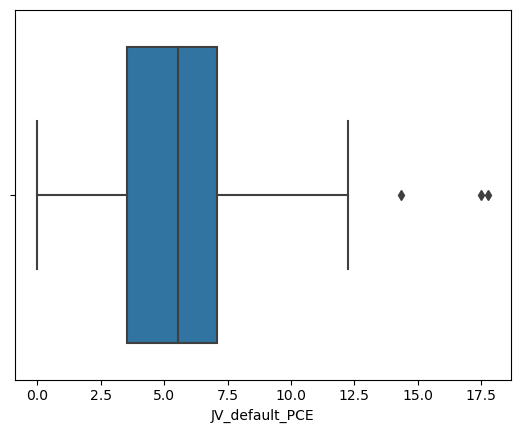

In [16]:
sns.boxplot(x=filtered_df["JV_default_PCE"]) # Boxplot for Sn based data

#### Outlier Removal

In [17]:
def IQR(series):
    """Finds out the interquartile range of a pandas series"""
    s = np.array(series)
    Q25 = np.percentile(s, 25) # 25 percentile
    Q75 = np.percentile(s, 75) # 75 percentile
    iqr = Q75-Q25 # interquartile range
    llim = Q25-(1.5*iqr) # Lower limit
    ulim = Q75+(1.5*iqr) # Upper limit
    return (llim, ulim)

In [18]:
llim, ulim = IQR(filtered_df["JV_default_PCE"]) # Find out the lower limit and upper limit
print(f"Range: {llim} -- {ulim}")

Range: -1.7974999999999994 -- 12.4225


In [19]:
cleaned_df = filtered_df[filtered_df["JV_default_PCE"]<=ulim] # Removing outliers
cleaned_df.shape

(256, 34)

In [20]:
cleaned_df.duplicated().sum() # Check for duplicated values

0

In [21]:
cleaned_df.to_csv(pwd+"/Sn_based/Sn_cleaned.csv", index=False) # Saving cleaned dataset for Sn-based perovskites

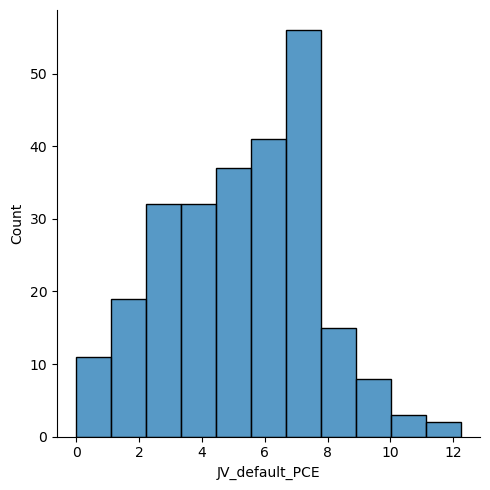

In [22]:
sns.displot(cleaned_df, x="JV_default_PCE") # distribution plot of PCE

In [23]:
cleaned_df["JV_default_PCE"].describe() # Describe the dataframe

count    256.000000
mean       5.284688
std        2.389818
min        0.000000
25%        3.445000
50%        5.505000
75%        7.055000
max       12.240000
Name: JV_default_PCE, dtype: float64